# 🏁 Módulo 4 – Preguntas de Negocio

**Objetivo del módulo**  
Aplicar todo lo aprendido (limpieza, EDA, visualización, agrupaciones) para **responder preguntas de negocio reales** con Python y Pandas.

**¿Por qué es importante?**  
Un analista de datos no solo organiza tablas: transforma datos en **insights accionables** que guían decisiones de producto, marketing o estrategia. Saber plantear y contestar preguntas concretas demuestra el valor práctico de tus habilidades técnicas.

---

En este notebook resolverás **20 preguntas** usando el dataset limpio `salarios_pais.csv`.  
Cada pregunta viene acompañada de una celda *Markdown* (enunciado) y su celda de código con la solución.



---
## 0 · Setup
Cargamos librerías y configuramos Seaborn para que los gráficos se vean con un estilo agradable.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# from cursos.analisis_datos.utils.paths import DATA_PROCESSED_DIR

# Project Root
PROJECT_ROOT = Path().resolve().parent.parent

# environment variables
ENV_PATH = PROJECT_ROOT / ".env"

# Directories paths
BASE_DIR = PROJECT_ROOT / "analisis_datos"
DATA_DIR = BASE_DIR / "data"
NOTEBOOKS_DIR = PROJECT_ROOT / "notebooks"
UTILS_DIR = PROJECT_ROOT / "utils"
REFERENCES_DIR = PROJECT_ROOT / "references"

# Data Directories
DATA_RAW_DIR = DATA_DIR / "raw"
DATA_PROCESSED_DIR = DATA_DIR / "processed"

path_salarios_pais = DATA_PROCESSED_DIR / "salarios_pais.csv"
path_salarios_pais = str(path_salarios_pais)
print(f"Ruta del archivo salarios_pais: {path_salarios_pais}")
print(f"existe archivo salarios_pais: {Path(path_salarios_pais).exists()}")
df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8')
df_salarios_pais.head()

Ruta del archivo salarios_pais: C:\Users\mpineda\Videos\ProyectosMapi\Analisis de datos\pydatapanama-cursos\cursos\analisis_datos\data\processed\salarios_pais.csv
existe archivo salarios_pais: True


,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.0,4981.0,5479.1,Santiago,19116209.0,3.170000e+11,16580.0,77320.1,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.0,1252.0,1377.2,Santiago,19116209.0,3.170000e+11,16580.0,143492.2,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.0,5262.0,5788.2,Bogotá,51874024.0,3.430000e+11,6611.0,98066.2,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.0,3671.0,4038.1,Santiago,19116209.0,3.170000e+11,16580.0,101168.1,Senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.0,10190.0,11209.0,Ciudad de Panamá,4468000.0,7.600000e+10,16995.0,72622.0,Junior


## 1️⃣ Pregunta  
**¿Cuál es la compensación total promedio en el dataset?**

### ¿Por qué importa?  
La media salarial brinda una referencia rápida para entender el nivel general de pago en la organización o sector. Permite comparar con benchmarks externos y detectar si la empresa está ofreciendo compensaciones competitivas.

### Pista  
La respuesta está a un solo método de distancia sobre la columna `compensacion_total`.

In [40]:
# Calcula la compensación total promedio
print(f"Compensacion promedio: {df_salarios_pais['compensacion_total'].mean().round(1)}")

Compensacion promedio: 94583.4


## 2️⃣ Pregunta  
**¿Quiénes son los 5 empleados con la compensación total más alta?**

### ¿Por qué importa?  
Identificar a los empleados mejor pagados ayuda a:  
- Detectar roles o perfiles críticos con alto valor de mercado.  
- Verificar consistencia salarial interna y posibles brechas injustificadas.  
- Analizar si los niveles de compensación se alinean con la estrategia de retención de talento.

### Pista   
Ordena la columna `compensacion_total` de forma descendente y toma solo las primeras 5 filas.

In [41]:
# Top 5 empleados con mayor compensación total

df_ordenado = df_salarios_pais.sort_values(by='compensacion_total', ascending=False)
df_ordenado.head()


,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
94,Luis,Rodríguez,53,Colombia,Sí,Amazon,AI Software Engineer,8,155281.0,11387.0,12525.7,Bogotá,51874024.0,3.430000e+11,6611.0,167806.7,Senior
162,Ana,Morales,54,México,Sí,Globant,AI Software Engineer,8,155005.0,9887.0,10875.7,Ciudad de México,126014024.0,1.410000e+12,11190.0,165880.7,Senior
7,Pedro,Herrera,25,México,Sí,Meta,AI Software Engineer,1,152001.0,11801.0,12981.1,Ciudad de México,126014024.0,1.410000e+12,11190.0,164982.1,Junior
143,Luis,Herrera,32,Costa Rica,Sí,Meta,AI Software Engineer,11,153058.0,9289.0,10217.9,San José,5150000.0,8.650000e+10,14319.0,163275.9,Senior
86,Lucía,Flores,53,Argentina,Sí,Google,AI Software Engineer,5,151380.0,10064.0,11070.4,Buenos Aires,45376763.0,6.410000e+11,14120.0,162450.4,Junior


## 3️⃣ Pregunta  
**¿Qué país registra la compensación total promedio más alta?**

### ¿Por qué importa?  
Conocer el país donde los salarios son más altos permite:  
- Evaluar mercados laborales competitivos y su impacto en costes de contratación.  
- Diseñar políticas de compensación diferenciadas por región.  
- Detectar posibles desalineamientos con el costo de vida o la estrategia global de la empresa.

### Pista  
Agrupa por `pais`, calcula el promedio de `compensacion_total` y ordena de mayor a menor.

In [42]:
# País con la compensación promedio más alta
df_agrupado_pais = df_salarios_pais.groupby('pais')['compensacion_total'].mean().round(1).sort_values(ascending=False)
df_agrupado_pais.head(1)



pais
Colombia    98578.3
Name: compensacion_total, dtype: float64

## 4️⃣ Pregunta  
**¿Cómo se distribuye la compensación total según el nivel de senioridad?**  
*(Visualiza la comparación con un boxplot).*

### ¿Por qué importa?  
- Revela si existen diferencias salariales significativas entre Juniors y Seniors.  
- Permite detectar outliers (pagos extremadamente altos o bajos) por nivel.  
- Ayuda a planificar escalas de compensación equitativas y competitivas.

### Pista  
Usa `sns.boxplot()` con `x='senioridad'` y `y='compensacion_total'`.

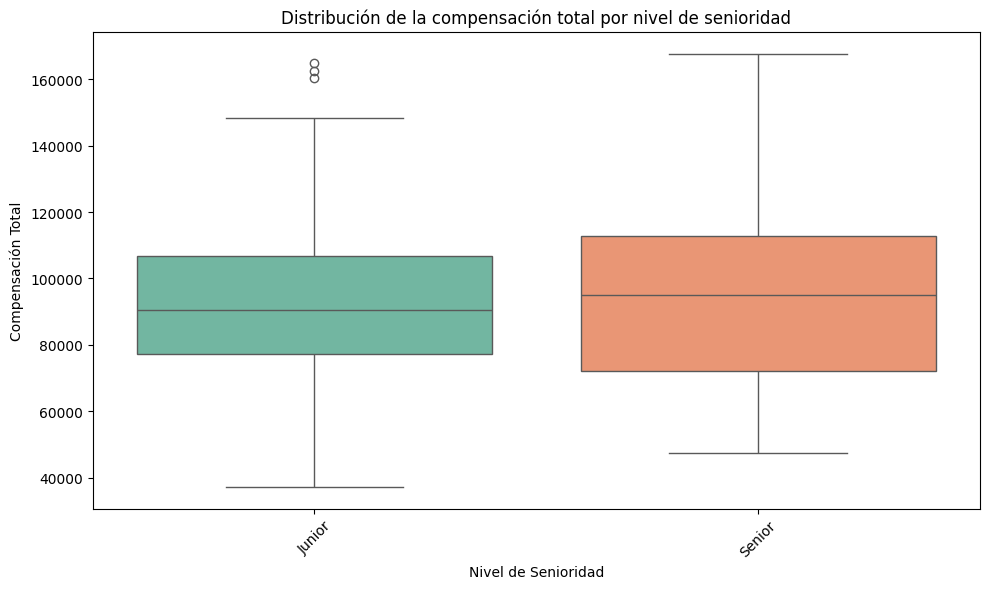

In [43]:
# Boxplot de compensación total por nivel de senioridad

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_salarios_pais, x='senioridad', y='compensacion_total', palette='Set2', hue='senioridad')

plt.title('Distribución de la compensación total por nivel de senioridad')
plt.xlabel('Nivel de Senioridad')
plt.ylabel('Compensación Total')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## 5️⃣ Pregunta  
**¿Existe correlación entre los años en la empresa y la compensación total?**

### ¿Por qué importa?  
- Permite evaluar si la antigüedad impacta directamente en el salario.  
- Ayuda a validar políticas de incremento por permanencia.  
- Detectar una baja correlación podría indicar que la compensación está más ligada a desempeño o rol que a tiempo en la organización.

### Pista  
Calcula el coeficiente de correlación de Pearson entre `anos_en_la_empresa` y `compensacion_total`.

In [44]:
# Correlación entre antigüedad y compensación total
correlacion = df_salarios_pais['anos_en_la_empresa'].corr(df_salarios_pais['compensacion_total'])
print(f"Correlación entre antigüedad y compensación total: {correlacion}")

Correlación entre antigüedad y compensación total: 0.01714541129758088


## 6️⃣ Pregunta  
**¿Qué cargo presenta la mediana de compensación total más alta?**

### ¿Por qué importa?  
- La mediana es robusta frente a outliers; refleja el salario “típico” para cada rol.  
- Ayuda a identificar posiciones clave con mayor valor de mercado o responsabilidad.  
- Informa decisiones de contratación y alineación salarial interna.

### Pista  
Agrupa por `cargo`, calcula la **mediana** de `compensacion_total`, ordena en orden descendente y observa el primer resultado.

In [45]:
# Cargo con la mediana de compensación total más alta
df_agrupado_cargo = df_salarios_pais.groupby('cargo')['compensacion_total'].median().round(1).sort_values(ascending=False)
df_agrupado_cargo.head(1)

cargo
AI Software Engineer    130957.7
Name: compensacion_total, dtype: float64

## 7️⃣ Pregunta  
**¿Cómo es la distribución de los bonos anuales en dólares?**  
*(Construye un histograma e incluye la curva KDE para visualizar la densidad).*

### ¿Por qué importa?  
- Ayuda a ver si los bonos están concentrados en un rango específico o tienen una cola larga.  
- Detecta outliers que podrían distorsionar el promedio.  
- Facilita comparar políticas de incentivos entre departamentos o países.

### Pista  
Usa `sns.histplot()` sobre la columna `bono_anual_dolares`, pon `bins=30` y `kde=True`.

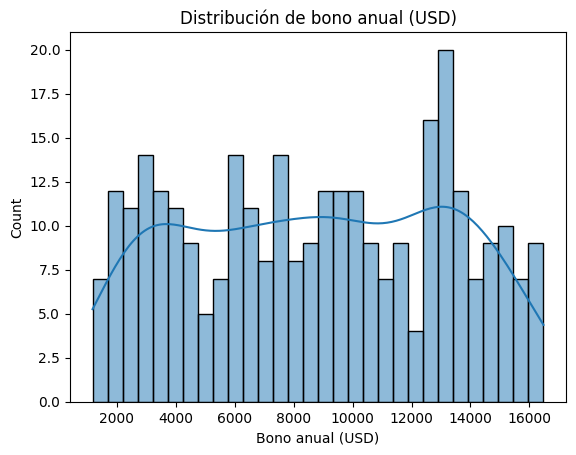

In [46]:
# Histograma y KDE de los bonos anuales en USD
sns.histplot(data=df_salarios_pais, x='bono_anual_dolares', bins=30, kde=True)
plt.title('Distribución de bono anual (USD)')
plt.xlabel('Bono anual (USD)')
plt.show()


## 8️⃣ Pregunta  
**¿Qué proporción de empleados proviene de cada país?**  
*(Visualiza el resultado en un barplot).*

### ¿Por qué importa?  
- Mide la **representatividad geográfica** de la fuerza laboral.  
- Ayuda a detectar concentración en un país y oportunidades de diversificación.  
- Sirve como referencia para ajustar políticas de compensación y beneficio regional.

### Pista  
Calcula `value_counts(normalize=True)` sobre la columna `pais`, multiplícalo por 100 para obtener porcentajes y grafícalo con `plot(kind='bar')`.

<function matplotlib.pyplot.show(close=None, block=None)>

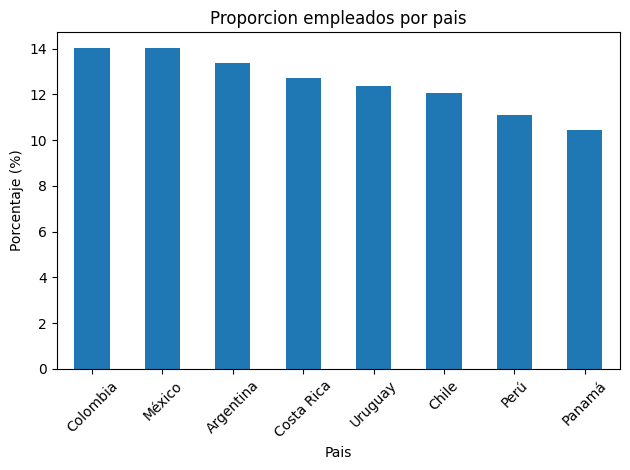

In [47]:
# Proporción de empleados por país (en %)
proporcion_paises = df_salarios_pais['pais'].value_counts(normalize=True) * 100
proporcion_paises.plot(kind='bar')
plt.title('Proporcion empleados por pais')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Pais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show


## 9️⃣ Pregunta  
**¿Cuál es el bono anual máximo registrado para cada cargo?**

### ¿Por qué importa?  
- Revela el techo de incentivos para cada rol.  
- Permite verificar si ciertos cargos reciben bonos excepcionalmente altos (posibles outliers o políticas de bonificación agresivas).  
- Ayuda a diseñar esquemas de reconocimiento competitivos y equitativos.

### Pista  
Agrupa por `cargo`, aplica `max()` a `bono_anual_dolares` y ordena el resultado de mayor a menor.

In [48]:
# Bono anual máximo por cargo
df_agrupado_cargo = df_salarios_pais.groupby('cargo')['bono_anual_dolares'].max().round(1).sort_values(ascending=False)
df_agrupado_cargo.head(1)

cargo
Python Developer    16476.9
Name: bono_anual_dolares, dtype: float64

## 🔟 Pregunta  
**¿Cuáles son los 3 países con más empleados que ocupan el cargo de *Data Scientist*?**

### ¿Por qué importa?  
- Indica dónde se concentra el talento de ciencia de datos en la organización.  
- Ayuda a orientar iniciativas de reclutamiento, formación y comunidades locales.  
- Puede revelar hubs de innovación o brechas regionales en ese perfil tan demandado.

### Pista  
Filtra el DataFrame por `cargo == "Data Scientist"` y aplica `value_counts()` sobre la columna `pais`, luego utiliza `.head(3)`.

In [49]:
# Top 3 países con más Data Scientists
df_data_scientist_filter = df_salarios_pais[df_salarios_pais['cargo'] == 'Data Scientist']['pais'].value_counts()
df_data_scientist_filter.head(3)


pais
Perú         7
Uruguay      6
Argentina    6
Name: count, dtype: int64

## 1️⃣1️⃣ Pregunta  
**¿Cómo se relacionan entre sí las variables numéricas del dataset?**  
*(Construye una matriz de correlación y preséntala en un heatmap).*

### ¿Por qué importa?  
- Detecta **relaciones lineales fuertes** (positivas o negativas) entre variables.  
- Ayuda a identificar **multicolinealidad** antes de crear modelos predictivos.  
- Destaca patrones inesperados que merecen análisis más profundo.

### Pista  
Selecciona solo las columnas numéricas (`select_dtypes('number')`), calcula `corr()` y grafica con `sns.heatmap(annot=True, cmap='coolwarm')`.

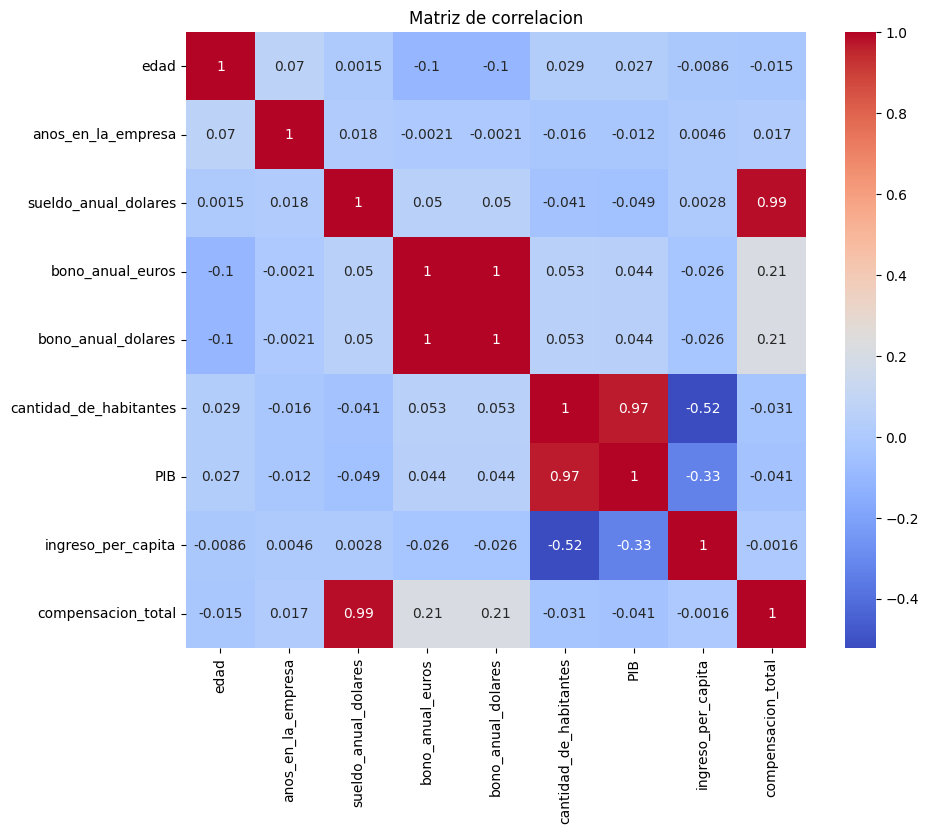

In [50]:
# Matriz de correlación numérica con heatmap
num_cols = df_salarios_pais.select_dtypes('number')
corr = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()


## 1️⃣2️⃣ Pregunta  
**¿Qué porcentaje de empleados del dataset tiene educación universitaria?**

### ¿Por qué importa?**  
- Mide el nivel de formación académica dentro de la organización.  
- Sirve de referencia para programas de capacitación, becas y desarrollo profesional.  
- Permite contrastar la brecha (si existe) entre compensación y formación.

### Pista
Usa `value_counts(normalize=True)` en la columna `educacion_universitaria`, luego multiplica por 100 para obtener el porcentaje.

<function matplotlib.pyplot.show(close=None, block=None)>

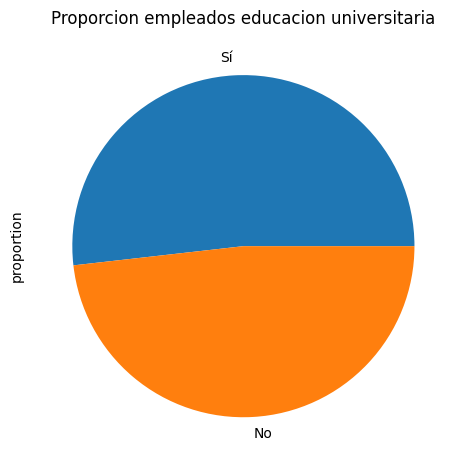

In [51]:
# Porcentaje de empleados con y sin educación universitaria
proporcion_paises = df_salarios_pais['educacion_universitaria'].value_counts(normalize=True) * 100
proporcion_paises.plot(kind='pie')
plt.title('Proporcion empleados educacion universitaria')
plt.xticks(rotation=180)
plt.tight_layout()
plt.show

## 1️⃣3️⃣ Pregunta  
**¿Cuál es la compensación total promedio por país y nivel de senioridad?**  
*(Presenta la respuesta en una tabla pivote).*

### ¿Por qué importa?  
- Permite comparar si la diferencia salarial entre Juniors y Seniors es coherente en todos los países.  
- Identifica países donde los Seniors se pagan por encima o por debajo de la media global.  
- Ayuda a diseñar políticas de compensación regionales y ajustar los planes de carrera.

### Pista  
Crea una tabla pivote con `index='pais'`, `columns='senioridad'` y `values='compensacion_total'`, usando `aggfunc='mean'`.

In [52]:
# Tabla pivote: compensación promedio por país y senioridad
tabla_pivote = pd.pivot_table(df_salarios_pais, index='pais', columns='senioridad', values='compensacion_total', aggfunc='mean')
tabla_pivote

senioridad,Junior,Senior
pais,,
Argentina,89211.747368,96921.354545
Chile,97065.143750,98729.214286
Colombia,96912.622727,100323.395238
Costa Rica,103058.793333,86087.170833
México,86462.661111,94921.744000
Panamá,90936.825000,94432.906250
Perú,92564.366667,93887.389474
Uruguay,91380.053333,99751.686957


## 1️⃣4️⃣ Pregunta  
**¿Qué relación existe entre el salario anual y el bono anual?**  
*(Visualízalo en un scatterplot).*

### ¿Por qué importa?  
- Permite ver si los bonos son proporcionales al salario base o se otorgan de forma independiente.  
- Ayuda a detectar empleados con bonos atípicamente altos respecto a su sueldo.  
- Informa sobre la política de incentivos y su coherencia interna.

### Pista  
Usa `sns.scatterplot()` con `x='sueldo_anual_dolares'` y `y='bono_anual_dolares'`.

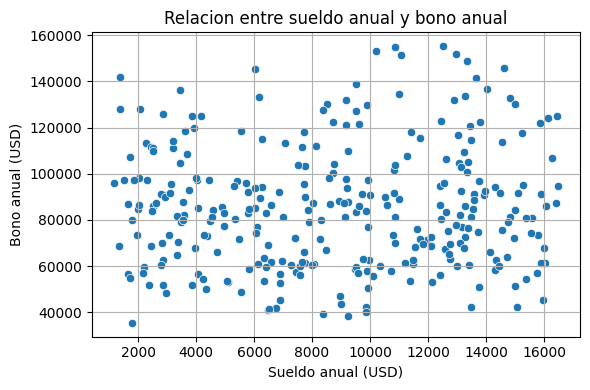

In [67]:
# Dispersión salario anual vs bono anual

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df_salarios_pais, 
                x="bono_anual_dolares", 
                y="sueldo_anual_dolares",
                color="#1f77b4",  
                ax=ax)

plt.title('Relacion entre sueldo anual y bono anual')
plt.xlabel('Sueldo anual (USD)')
plt.ylabel('Bono anual (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 1️⃣5️⃣ Pregunta  
**¿Qué porcentaje de empleados lleva más de 5 años en la empresa?**

### ¿Por qué importa?  
- Mide la **retención de talento** y la estabilidad de la plantilla.  
- Un porcentaje alto indica lealtad y experiencia acumulada; uno bajo puede señalar rotación elevada.  
- Informa iniciativas de engagement y programas de reconocimiento para empleados veteranos.

### Pista  
Aplica una condición `df['anos_en_la_empresa'] > 5`, usa `.mean()` para obtener la proporción y multiplícalo por 100.

In [71]:
# Porcentaje de empleados con más de 5 años en la empresa
porc_retencion_talento = (df_salarios_pais['anos_en_la_empresa'] > 5).mean() * 100
porc_retencion_talento

np.float64(55.700325732899024)

## 1️⃣6️⃣ Pregunta  
**¿Qué país presenta el bono anual promedio más alto?**

### ¿Por qué importa?  
- Indica dónde la empresa invierte más en incentivos variables.  
- Ayuda a evaluar la competitividad de los planes de bonificación por región.  
- Puede revelar disparidades que requieran revisión de políticas de compensación.

### Pista  
Agrupa por `pais`, calcula la media de `bono_anual_dolares` y ordena de mayor a menor.

In [72]:
# País con el bono anual promedio más alto
df_agrupado_pais = df_salarios_pais.groupby('pais')['bono_anual_dolares'].mean().round(1).sort_values(ascending=False)
df_agrupado_pais.head(1)

pais
México    9359.8
Name: bono_anual_dolares, dtype: float64

## 1️⃣7️⃣ Pregunta  
**¿Cómo varía la distribución de la compensación total entre países?**  
*(Muestra un boxplot por país para comparar rangos y outliers).*

### ¿Por qué importa?  
- Visualiza diferencias salariales entre mercados.  
- Ayuda a identificar países con mayor dispersión o presencia de outliers altos/bajos.  
- Facilita decisiones sobre ajustes regionales y equidad interna.

### Pista  
Emplea `sns.boxplot()` con `x='pais'` y `y='compensacion_total'`; rota las etiquetas para que no se solapen.

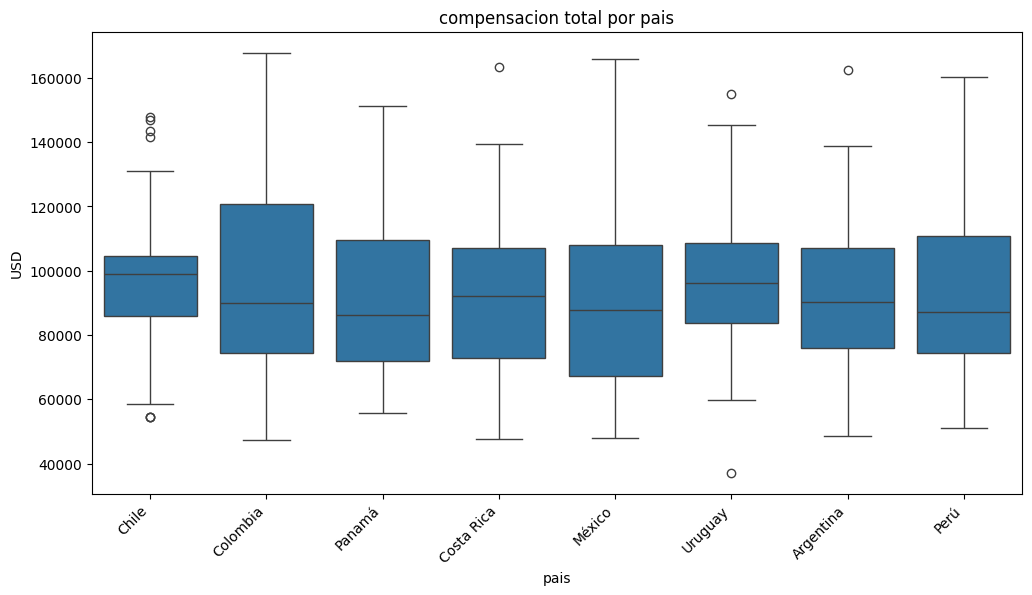

In [73]:
# Boxplot de compensación total por país
plt.figure(figsize=(12,6))
sns.boxplot(data=df_salarios_pais, x='pais', y='compensacion_total')

plt.xticks(rotation=45, ha='right')

plt.title('compensacion total por pais')
plt.ylabel('USD')
plt.show()

## 1️⃣8️⃣ Pregunta  
**¿Cuál es el promedio de años en la empresa para cada cargo?**

### ¿Por qué importa?  
- Indica qué roles retienen talento por más tiempo.  
- Ayuda a identificar posiciones con alta rotación que podrían requerir planes de carrera o incentivos adicionales.  
- Ofrece información para comparar madurez y profundidad de experiencia entre áreas.

### Pista  
Agrupa por `cargo`, aplica `mean()` sobre `anos_en_la_empresa` y ordena descendente para ver los cargos con mayor antigüedad media.

In [75]:
# Promedio de años en la empresa por cargo
df_agrupado_cargo = df_salarios_pais.groupby('cargo')['anos_en_la_empresa'].mean().round(1).sort_values(ascending=False)
df_agrupado_cargo.head()

cargo
Product Owner           7.8
Data Scientist          7.0
Python Developer        6.7
Data Analyst            6.6
AI Software Engineer    6.5
Name: anos_en_la_empresa, dtype: float64

## 1️⃣9️⃣ Pregunta  
**¿Cuál es la mediana del ingreso per cápita entre los países presentes en el dataset?**

### ¿Por qué importa?  
- Brinda un punto de referencia de **poder adquisitivo** promedio para las regiones donde opera la empresa.  
- Facilita comparar la compensación interna con los niveles de ingreso del país, aportando contexto sobre competitividad salarial local.  
- La mediana es robusta frente a valores extremos y refleja mejor el ingreso “típico” que el promedio en economías dispares.

### Pista  
Basta con aplicar `.median()` a la columna `ingreso_per_capita`.

In [76]:
# Mediana del ingreso per cápita de los países
mediana_ingreso = df_salarios_pais['ingreso_per_capita'].median()
mediana_ingreso

np.float64(14120.0)

## 2️⃣0️⃣ Pregunta  
**¿Cómo se distribuyen los bonos anuales (USD) según el nivel de senioridad?**  
*(Representa la comparación con un violinplot).*

### ¿Por qué importa?  
- Muestra no solo la mediana y el rango, sino la **densidad completa** de los bonos para Juniors y Seniors.  
- Facilita detectar si los rangos de bonos se solapan o si los Seniors reciben incentivos notablemente mayores.  
- Ayuda a evaluar la equidad y efectividad del esquema de bonificación por experiencia.

### Pista  
Usa `sns.violinplot()` con `x='senioridad'` y `y='bono_anual_dolares'`.

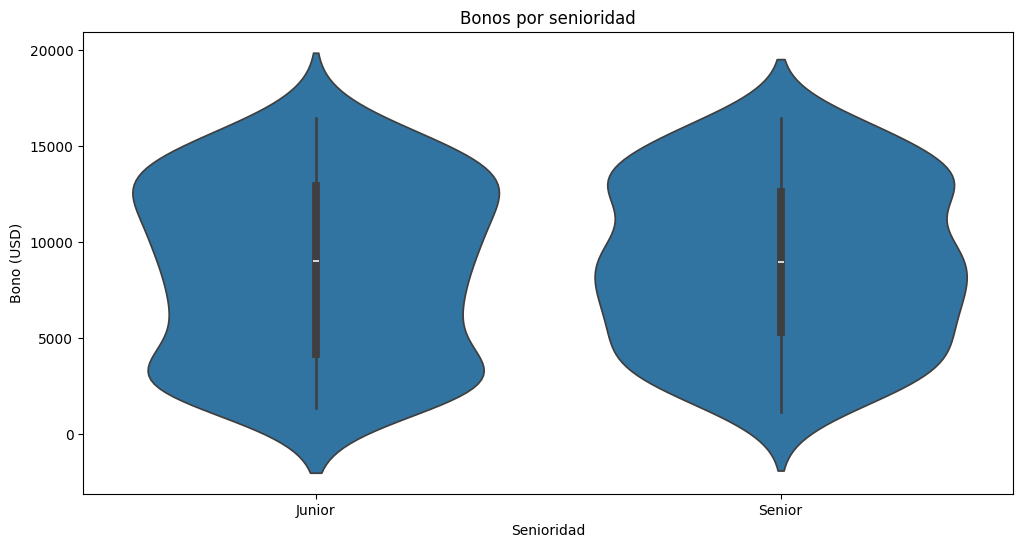

In [82]:
# Violinplot de bonos anuales por senioridad
plt.figure(figsize=(12,6))
sns.violinplot(df_salarios_pais, x='senioridad', y='bono_anual_dolares')
plt.title('Bonos por senioridad')
plt.ylabel('Bono (USD)')
plt.xlabel('Senioridad')
plt.show()

## 🎉 ¡Felicidades!

Has completado el proyecto integral de **Análisis de Datos con Python**.  
Pasaste por todo el ciclo:

1. **Preparar el entorno**  
2. **Limpiar y transformar datos**  
3. **Explorar con visualizaciones**  
4. **Responder preguntas de negocio reales**

Cada notebook, gráfico y métrica que generaste demuestra tu capacidad para convertir datos en información valiosa. ¡Sigue practicando, comparte tus hallazgos con la comunidad PyData Panamá y recuerda que el siguiente insight puede cambiar una decisión clave!

🚀 **Buen trabajo, Data Analyst**. 